In [1]:
shhh <- function(expr) suppressPackageStartupMessages(suppressWarnings(suppressMessages(expr)))
shhh({
library(tidyverse); 
library(lubridate); 
library(scales);
library(magrittr); 
library(dplyr);
})

In [2]:
library(IRdisplay)

display_html(
'<script>  
code_show=true; 
function code_toggle() {
  if (code_show){
    $(\'div.input\').hide();
  } else {
    $(\'div.input\').show();
  }
  code_show = !code_show
}  
$( document ).ready(code_toggle);
</script>
  <form action="javascript:code_toggle()">
    <input type="submit" value="Click here to toggle on/off the raw code.">
 </form>'
)

In [2]:
options(repr.plot.width = 15, repr.plot.height = 10)

# Introduction

__April 20, 2022__   
__May 2, 2022__  
__May 13, 2022__  

[Parent QA ticket](https://phabricator.wikimedia.org/T305442) | [QA ticket](https://phabricator.wikimedia.org/T306557)

# Instrumentation note
The related events will be stored in schema mediawiki_web_ui_scroll with action='scroll-to-toc' .
Sample rate :
On euwiki and hewiki, sample rate is 100% for logged in users,10% for anons.
Other wikis : TBC

# QA mediawiki_web_ui_scroll schema

## check start date , available wikis and access method

In [16]:
query <-
"
SELECT meta.domain, access_method, min(meta.dt) as first_event_ts
FROM  event.mediawiki_web_ui_scroll
WHERE year=2022 and month=4
AND action='scroll-to-toc'
GROUP BY meta.domain, access_method
ORDER BY first_event_ts  
LIMIT 10000
"

In [17]:
df <-  wmfdata::query_hive(query)

Don't forget to authenticate with Kerberos using kinit



In [18]:
df

domain,access_method,first_event_ts
<chr>,<chr>,<chr>
www.mediawiki.org,desktop,2022-04-05T08:52:23.286Z
en.wiktionary.org,desktop,2022-04-06T08:49:59.437Z
he.wikipedia.org,desktop,2022-04-06T08:54:27.969Z
ru.wiktionary.org,desktop,2022-04-06T09:02:48.310Z
www.wikidata.org,desktop,2022-04-06T09:08:50.789Z
fr.wiktionary.org,desktop,2022-04-06T09:12:44.496Z
pl.wikibooks.org,desktop,2022-04-06T09:13:19.601Z
ca.wikipedia.org,desktop,2022-04-06T09:20:24.221Z
it.wikipedia.org,desktop,2022-04-06T09:28:07.155Z


__Note:__  

- The events of `scroll-to-toc` is avaiable since 2022-04-05 on 104 wikis. 
- All events are recored as `desktop` access method. 


## By wiki

In [22]:
query <- 
"
SELECT meta.domain,  COUNT(1) AS events,
COUNT(DISTINCT web_session_id) AS sessions,
COUNT(DISTINCT page_id) AS pages ,
min(meta.dt) as first_event_ts
FROM  event.mediawiki_web_ui_scroll
WHERE year=2022 and month=4
AND action='scroll-to-toc'
GROUP BY meta.domain
ORDER BY events DESC
LIMIT 10000
"


In [23]:
df <- wmfdata::query_hive(query)

Don't forget to authenticate with Kerberos using kinit



In [24]:
df

domain,events,sessions,pages,first_event_ts
<chr>,<int>,<int>,<int>,<chr>
fr.wikipedia.org,41418,10578,14224,2022-04-07T08:16:54.576Z
pt.wikipedia.org,9431,2489,3257,2022-04-07T08:38:49.147Z
he.wikipedia.org,7973,1938,2732,2022-04-06T08:54:27.969Z
fa.wikipedia.org,4907,1415,1579,2022-04-07T08:14:36.540Z
tr.wikipedia.org,4360,1189,1577,2022-04-07T08:37:38.907Z
vi.wikipedia.org,4168,1088,1342,2022-04-07T08:22:29.726Z
ko.wikipedia.org,2879,687,927,2022-04-07T08:17:57.554Z
id.wikipedia.org,2577,616,793,2022-04-07T08:30:07.945Z
th.wikipedia.org,2238,519,752,2022-04-07T08:27:22.963Z


__Note:__  

- fr.wikipedia.org has most `scroll-to-toc` events and sessions, 4.25 times of the 2nd place pt.wikipedia.org. Need to check the sample rate. 

__Edits by logged-in users by wikis__

scoll-to-toc is only enabled on logged-in users. We'd like to compare the traffic to edits by logged-in users on each wikis.

In [7]:
query_edits <-
"
SELECT
   database_code,domain_name,
   SUM(IF(user_is_anonymous, 0, edit_count)) AS logged_in_edits, SUM(edit_count)  AS total_non_bot_edits
FROM wmf.edit_hourly
INNER JOIN canonical_data.wikis ON CONCAT(project,'.org') = domain_name
AND domain_name IN ('fr.wikipedia.org',
'pt.wikipedia.org',
'he.wikipedia.org',
'fa.wikipedia.org',
'tr.wikipedia.org',
'vi.wikipedia.org',
'ko.wikipedia.org' )
WHERE
    ts >= '2022-03-01'
   AND ts < '2022-04-01'
   AND NOT user_is_bot
   AND snapshot = '2022-03'
GROUP BY database_code, domain_name
ORDER BY logged_in_edits DESC
LIMIT 10000
"

In [8]:
df_edits <- wmfdata::query_hive(query_edits)

Don't forget to authenticate with Kerberos using kinit



In [9]:
df_edits

database_code,domain_name,logged_in_edits,total_non_bot_edits
<chr>,<chr>,<int>,<int>
frwiki,fr.wikipedia.org,664414,753326
ptwiki,pt.wikipedia.org,181000,181572
fawiki,fa.wikipedia.org,155959,156573
hewiki,he.wikipedia.org,152557,176318
kowiki,ko.wikipedia.org,113677,164669
trwiki,tr.wikipedia.org,110095,122729
viwiki,vi.wikipedia.org,100218,125267


## By anonymous user

QAed on 2022-04-20

In [81]:
query <- 
"
select is_anon, COUNT(1) AS events,
COUNT(DISTINCT web_session_id) AS sessions,
COUNT(DISTINCT page_id) AS pages
FROM event.mediawiki_web_ui_scroll
WHERE year=2022 and month=4
AND action='scroll-to-toc'
GROUP BY is_anon
"

In [82]:
df <- wmfdata::query_hive(query)

Don't forget to authenticate with Kerberos using kinit



In [83]:
df

is_anon,events,sessions,pages
<chr>,<int>,<int>,<int>
false,148746,36813,49566


__Note:__ 

Only enabled on logged-in user

QAed on 2022-05-02

In [10]:
query <- 
"
select is_anon, COUNT(1) AS events,
COUNT(DISTINCT web_session_id) AS sessions,
COUNT(DISTINCT page_id) AS pages
FROM event.mediawiki_web_ui_scroll
WHERE year=2022 and month IN (4,5)
AND action='scroll-to-toc'
GROUP BY is_anon
"

In [11]:
df <- wmfdata::query_hive(query)

Don't forget to authenticate with Kerberos using kinit



In [12]:
df

is_anon,events,sessions,pages
<chr>,<int>,<int>,<int>
false,1064917,127126,238458
true,4016669,1606333,534856


__Note:__ 

Enabled on logged-in users and anonymous users on 2022-05-02

## By agent type

In [90]:
query <- 
"
select COUNT(1) AS events,
COUNT(DISTINCT web_session_id) AS sessions,
COUNT(DISTINCT page_id) AS pages
FROM event.mediawiki_web_ui_scroll
WHERE year=2022 and month=4
AND action='scroll-to-toc'
AND user_agent_map['device_family']='Spider' 
"

In [91]:
df <- wmfdata::query_hive(query)


Don't forget to authenticate with Kerberos using kinit



In [92]:
df

events,sessions,pages
<int>,<int>,<int>
0,0,0


In [95]:
query <- 
"
select action, COUNT(1) AS events,
COUNT(DISTINCT web_session_id) AS sessions,
COUNT(DISTINCT page_id) AS pages
FROM event.mediawiki_web_ui_scroll
WHERE year=2022 and month=4
AND user_agent_map['device_family']='Spider' 
GROUP BY action
"

In [96]:
df <- wmfdata::query_hive(query)


Don't forget to authenticate with Kerberos using kinit



In [97]:
df

action,events,sessions,pages
<chr>,<int>,<int>,<int>
scroll-to-top,9,5,5


__Note:__  

Do not find any `scroll-to-toc` events from `spider`.

## By Date

In [4]:
query <-
"
SELECT TO_DATE(meta.dt) as date_time, COUNT(1) AS events,
COUNT(DISTINCT web_session_id) AS sessions,
COUNT(DISTINCT page_id) AS pages
FROM  event.mediawiki_web_ui_scroll
WHERE year=2022 and month=4
AND action='scroll-to-toc'
AND meta.domain='he.wikipedia.org' 
GROUP BY TO_DATE(meta.dt) 
ORDER BY date_time
LIMIT 100000
"

In [5]:
df_date <- wmfdata::query_hive(query)

Don't forget to authenticate with Kerberos using kinit



In [6]:
df_date

date_time,events,sessions,pages
<chr>,<int>,<int>,<int>
2022-04-06,661,204,261
2022-04-07,854,249,321
2022-04-08,780,221,280
2022-04-09,690,211,283
2022-04-10,964,265,364
2022-04-11,972,296,380
2022-04-12,862,278,357
2022-04-13,844,252,345
2022-04-14,836,244,320


In [7]:
df_date$date_time <- as.Date(df_date$date_time )

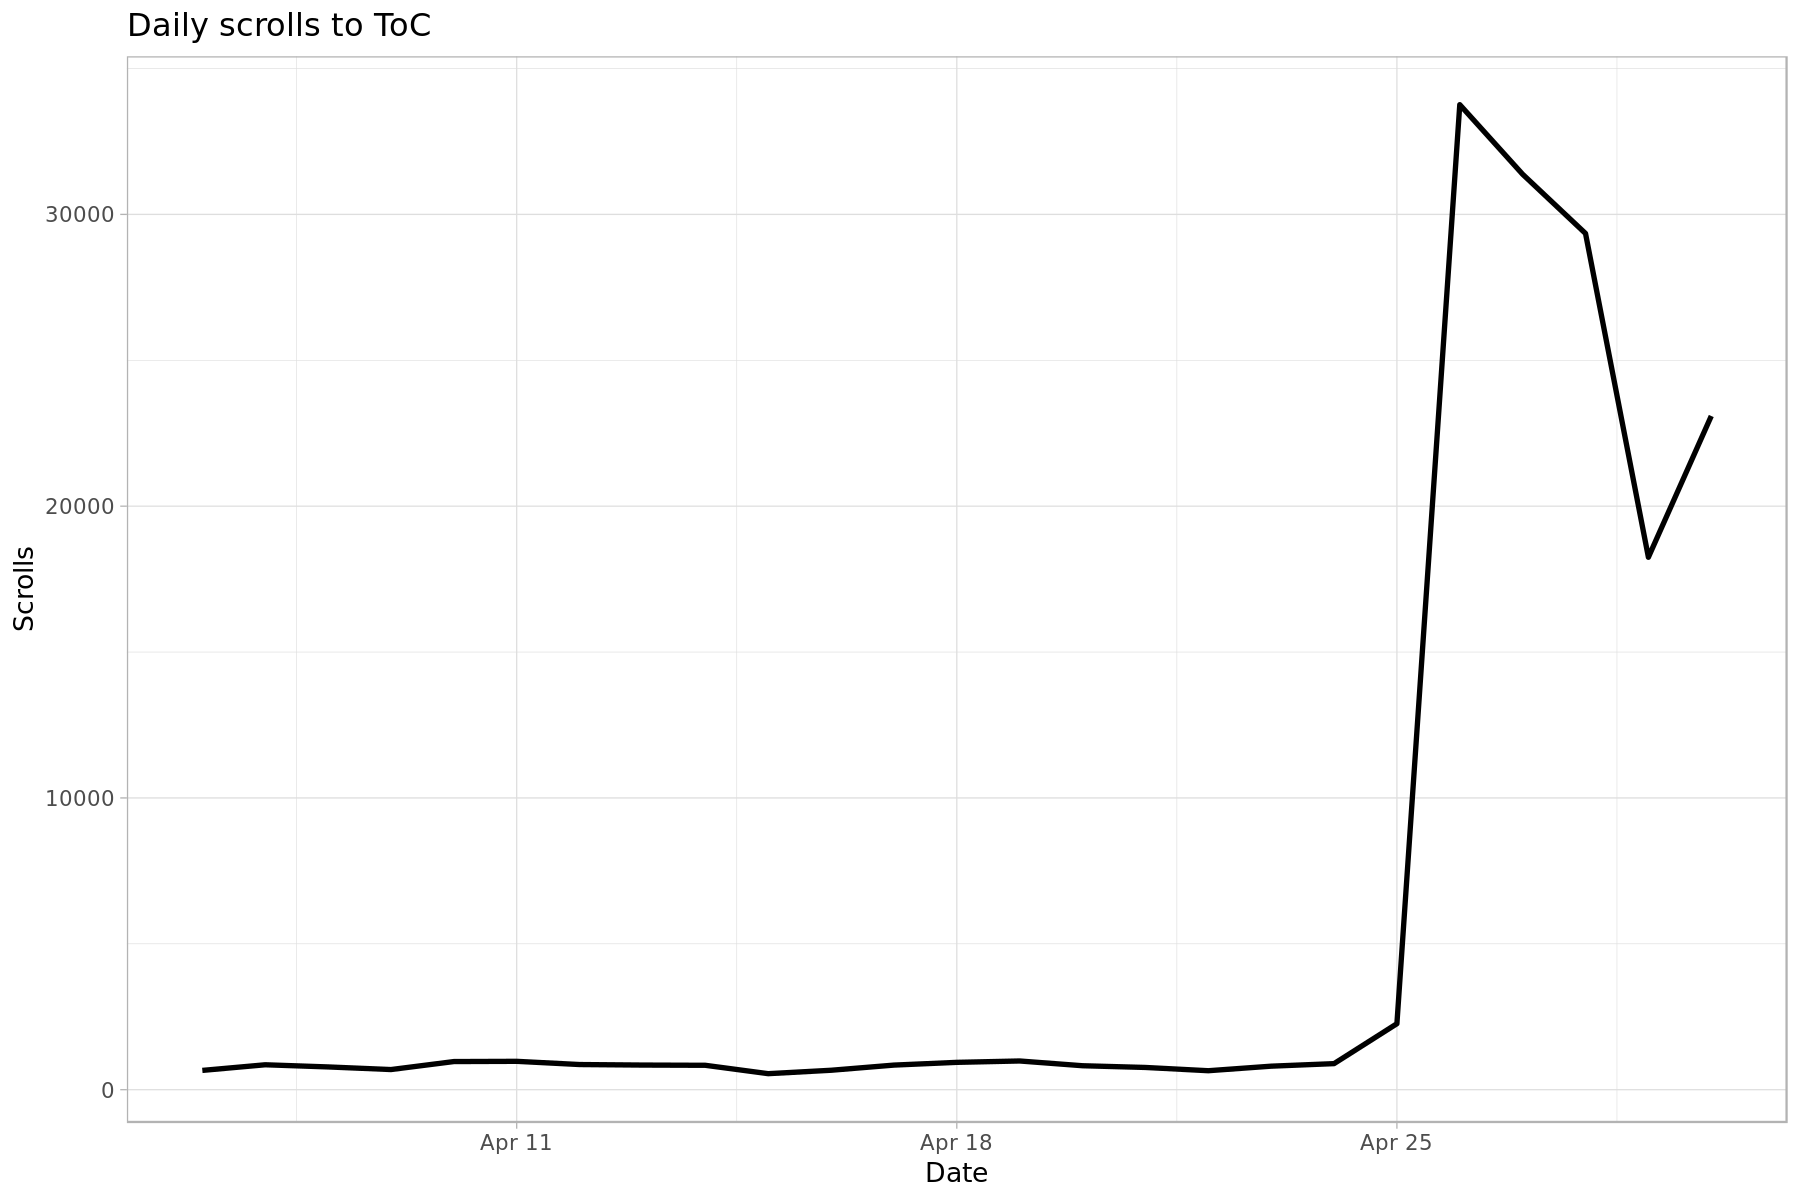

In [9]:
g_scrolls <- ggplot(data=df_date ) +
geom_line(mapping=aes(x=date_time, y=events), size = 1.5) +
labs(title = 'Daily scrolls to ToC',
     x = 'Date',
     y = 'Scrolls') + 
theme_light(base_size = 16) ;
g_scrolls

# QA the fix 

[fix ticket](https://phabricator.wikimedia.org/T307952)

In [20]:
query <-
"
SELECT meta.domain, TO_DATE(meta.dt) as date_time,  action, COUNT(1) AS events,
COUNT(DISTINCT web_session_id) AS sessions,
COUNT(DISTINCT page_id) AS pages
FROM  event.mediawiki_web_ui_scroll
WHERE year=2022 and month=5 and day<=12
AND meta.domain IN ('en.wikipedia.org', 'he.wikipedia.org','eu.wikipedia.org')
GROUP BY meta.domain, action, TO_DATE(meta.dt) 
ORDER BY date_time
LIMIT 100000
"

In [21]:
df <- wmfdata::query_hive(query)

Don't forget to authenticate with Kerberos using kinit



In [27]:
filter(df, (domain=='en.wikipedia.org')&(action=='scroll-to-toc'))

domain,date_time,action,events,sessions,pages
<chr>,<date>,<chr>,<int>,<int>,<int>
en.wikipedia.org,2022-05-01,scroll-to-toc,13627,1076,4518
en.wikipedia.org,2022-05-02,scroll-to-toc,15178,1196,4849
en.wikipedia.org,2022-05-03,scroll-to-toc,12708,1126,4214
en.wikipedia.org,2022-05-04,scroll-to-toc,13433,1141,4517
en.wikipedia.org,2022-05-05,scroll-to-toc,13354,1083,4488
en.wikipedia.org,2022-05-06,scroll-to-toc,11905,1120,4172
en.wikipedia.org,2022-05-07,scroll-to-toc,11679,928,3928
en.wikipedia.org,2022-05-08,scroll-to-toc,11437,1029,3895
en.wikipedia.org,2022-05-09,scroll-to-toc,13464,1205,4454


In [23]:
filter(df, (domain=='he.wikipedia.org')&(action=='scroll-to-top'))

domain,date_time,action,events,sessions,pages
<chr>,<chr>,<chr>,<int>,<int>,<int>
he.wikipedia.org,2022-05-01,scroll-to-top,32097,12290,11971
he.wikipedia.org,2022-05-02,scroll-to-top,29770,11927,11307
he.wikipedia.org,2022-05-03,scroll-to-top,30700,12188,11368
he.wikipedia.org,2022-05-04,scroll-to-top,25726,9772,9810
he.wikipedia.org,2022-05-05,scroll-to-top,23170,8264,8857
he.wikipedia.org,2022-05-06,scroll-to-top,23179,8316,8908
he.wikipedia.org,2022-05-07,scroll-to-top,24083,8936,9623
he.wikipedia.org,2022-05-08,scroll-to-top,30204,12007,11667
he.wikipedia.org,2022-05-09,scroll-to-top,29701,11558,11748


In [24]:
df$date_time <- as.Date(df$date_time)

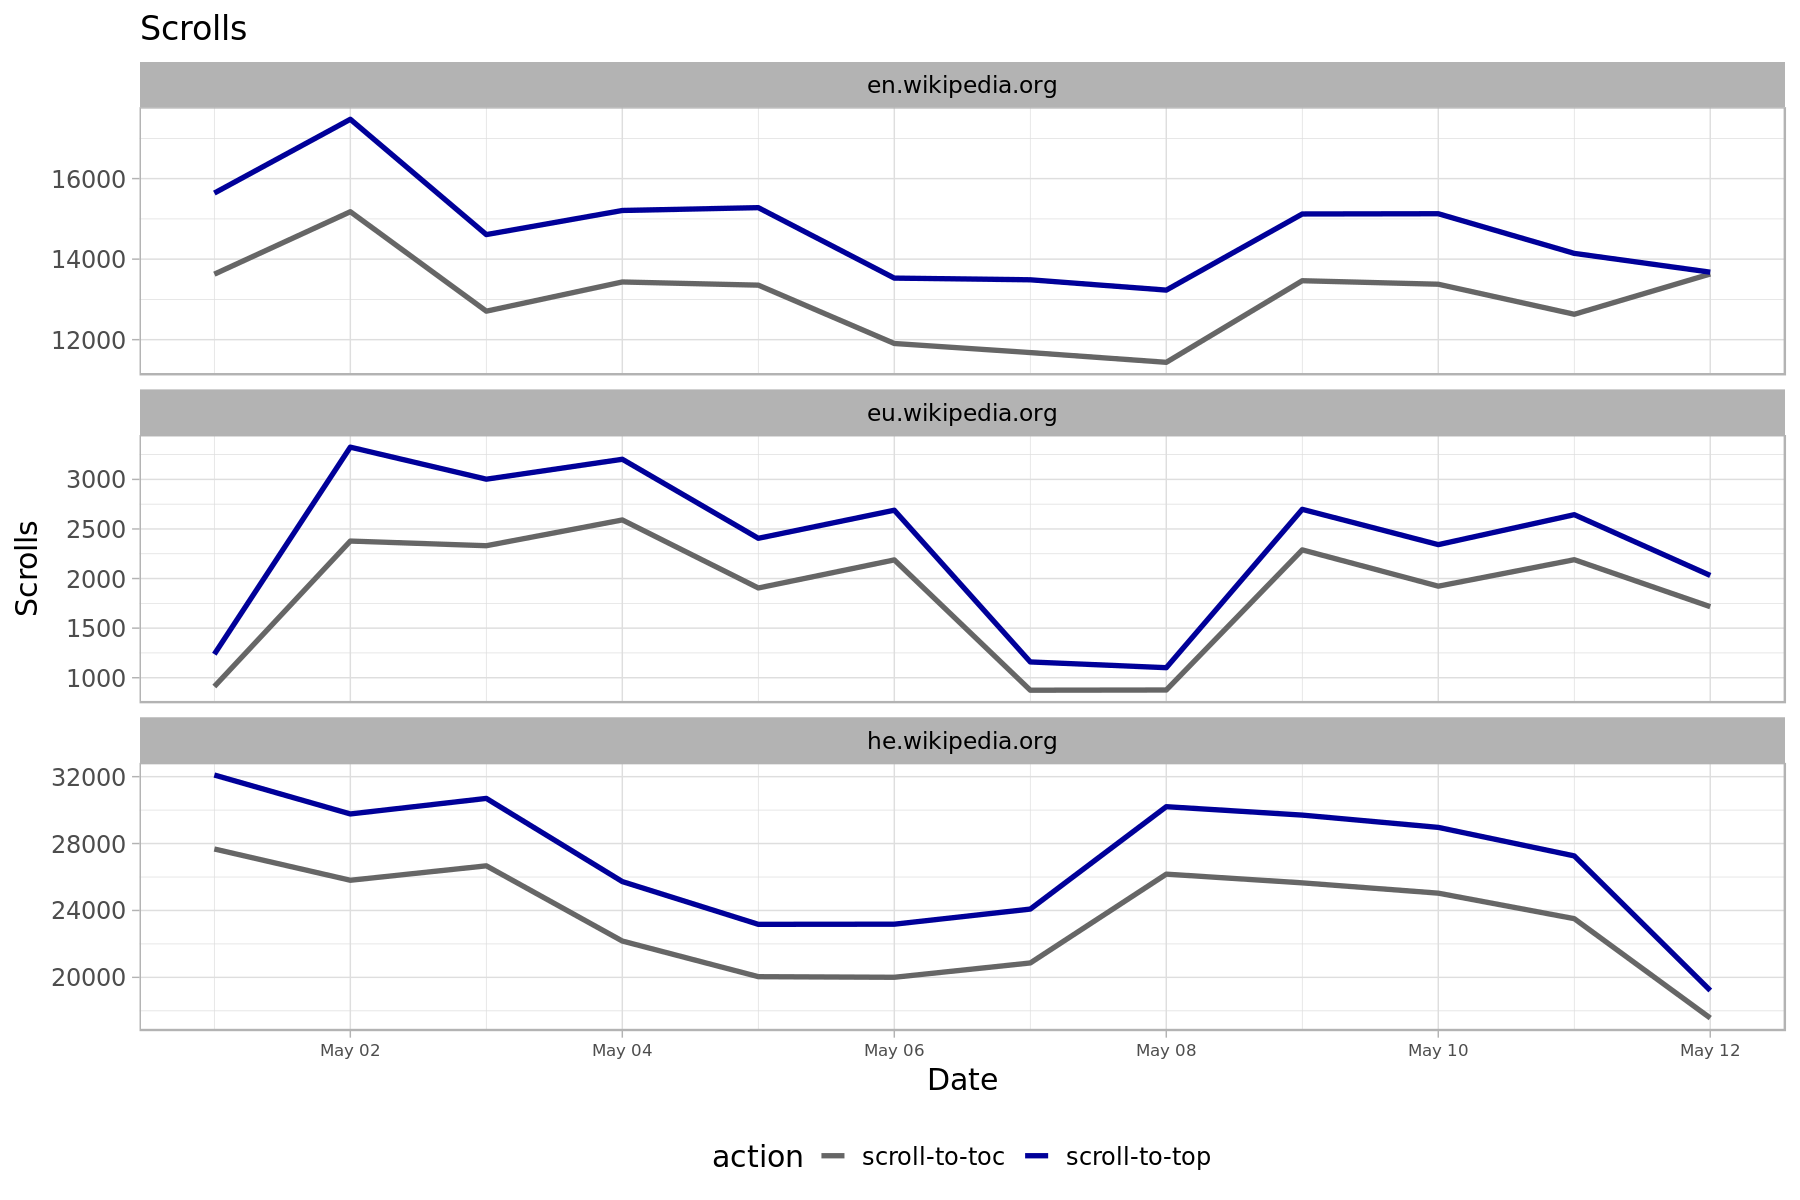

In [26]:
action_g <- df %>%
ggplot(mapping=aes(x=date_time, y=events,color=action )) +
geom_line( size = 1.5) +
scale_color_manual(values= c("#666666", "#000099"), name = "action")  +
facet_wrap(~domain,nrow=4,scale = 'free_y')+
labs(title = 'Scrolls',
     x = 'Date',
     y = 'Scrolls') +
theme_light(base_size=18) +
theme(legend.position = "bottom", 
     plot.caption = element_text(hjust = 0, face= "italic"),
     strip.text = element_text(size = 14, colour='black'),
     axis.text.x = element_text( size = 10 ),
     plot.title = element_text(size=20))
action_g